In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from io import StringIO
from typing import Optional
# API URL that provides the dataset in JSON format
url = 'https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json'

# Make the GET request to the API
response = requests.get(url)

In [2]:
# Verify that the request was successful (status code 200)
if response.status_code == 200:
    # Access the content of the response, which is a JSON
    data = response.json()

    # Convert JSON object to JSON string
    json_str = json.dumps(data)

    # Use StringIO to convert the JSON string to a file-like object
    json_data = StringIO(json_str)

    # Read the file-like object with pd.read_json() and store it in 'df'
    df = pd.read_json(json_data)

    print('DataFrame created successfully:')
    display(df.head())
    df.info()
else:
    print(f'Error making request: Status code {response.status_code}')

DataFrame creado con éxito:


,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,41333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,41333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,39800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,41333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51646 entries, 0 to 51645
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           51646 non-null  int64  
 1   name          51645 non-null  object 
 2   type          51646 non-null  object 
 3   price         51646 non-null  float64
 4   upc           51646 non-null  int64  
 5   category      51646 non-null  object 
 6   shipping      51646 non-null  object 
 7   description   51646 non-null  object 
 8   manufacturer  51584 non-null  object 
 9   model         48783 non-null  object 
 10  url           51646 non-null  object 
 11  image         51646 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.7+ MB


In [3]:
# Sample of how the data comes by column
for index, row in df.iterrows():
    category = row['name']
    if index == 50039:
        print(category)

Jensen - Nickel-Metal Hydride Battery for Select AT&T and VTech Cordless Phones - Black


In [4]:
# Concatenate and extract the categories
def extract(categories):
    return ', '.join(category['name'] for category in categories)

In [5]:
data_df = df.copy()
data_df['category'] = data_df['category'].apply(extract)
category_counts = data_df['category'].value_counts()
total_count = category_counts.sum()

for cat, count in category_counts.items():
    print(f"{cat}: {count}")

print(total_count)


Video Games, Pre-Owned Games: 3556
Cell Phones, Cell Phone Accessories, Cell Phone Cases & Clips: 1845
Cell Phones, Cell Phone Accessories, iPhone Accessories, iPhone Cases & Clips: 1471
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits: 739
Appliances, Refrigerators, All Refrigerators: 689
Audio, Bluetooth & Wireless Speakers: 637
Musical Instruments, Sheet Music & DVDs, Sheet Music: 621
Computers & Tablets, iPad & Tablet Accessories, Cases, Covers & Keyboard Folios: 508
Appliances, Small Kitchen Appliances, Cookware, Bakeware & Cutlery, Cookware: 486
Connected Home & Housewares, Office & School Supplies, Printer Ink & Toner, Printer Ink: 476
Computers & Tablets, Computer Accessories & Peripherals, Laptop Accessories, Laptop Bags & Cases: 432
TV & Home Theater, TV Stands, Mounts & Furniture, TV Stands, All TV Stands: 409
Audio, Headphones, Earbud & In-Ear Headphones: 400
Best Buy Gift Cards: 388
C

<ipython-input-6-6519f64eaf33>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


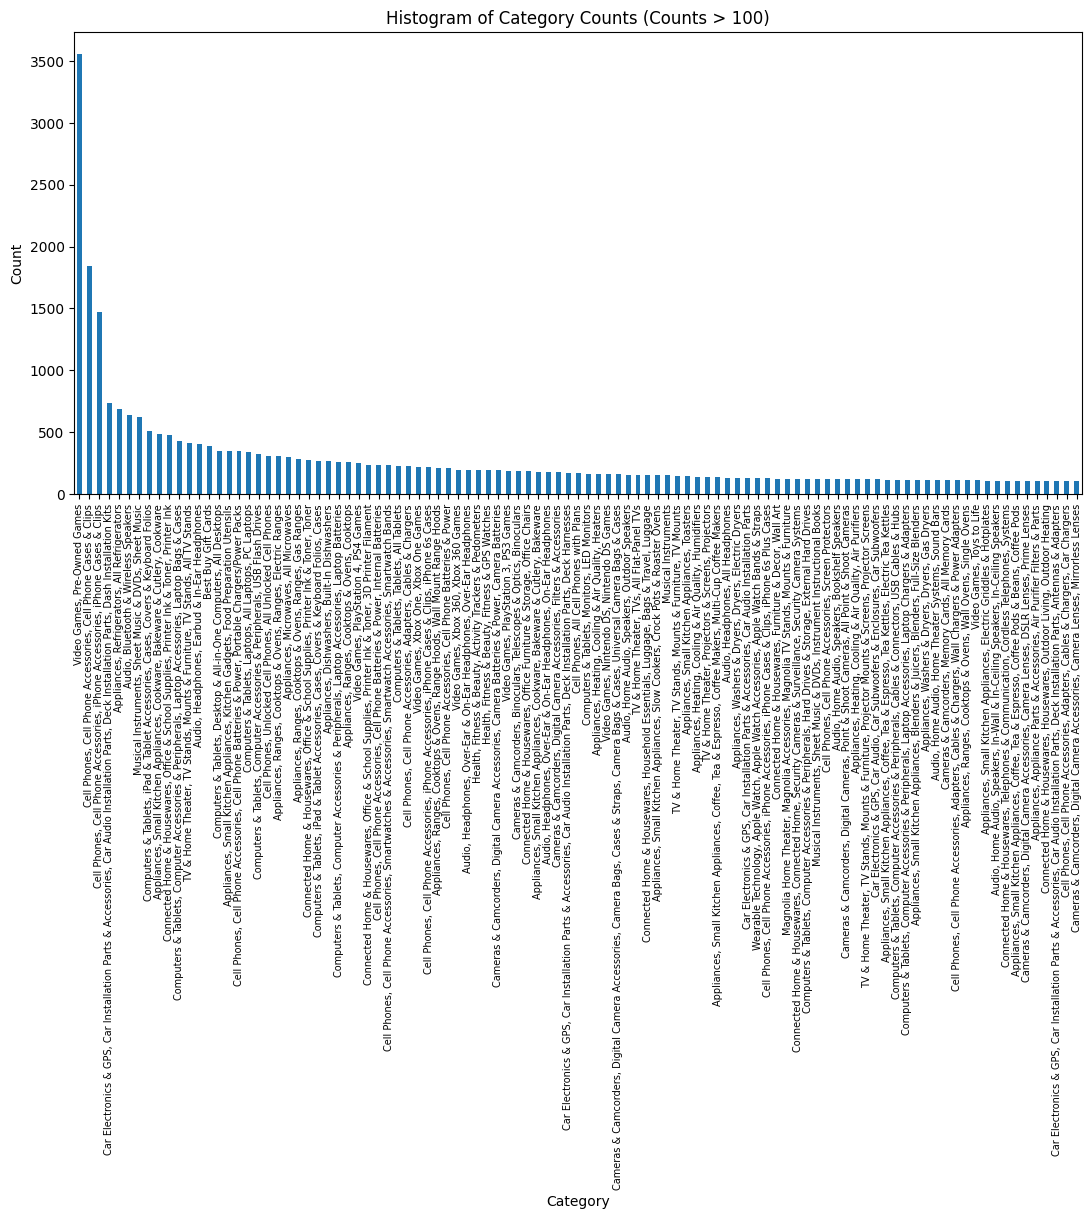

In [6]:
category_counts_above_100 = category_counts[category_counts > 100]

plt.figure(figsize=(13, 6))
category_counts_above_100.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Category Counts (Counts > 100)')
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

In [7]:
# Count of articles for each category
print(total_count)
for category, count in category_counts_above_100.items():
    print(f"{category}: {count}")

category_count_above_100 = len(category_counts_above_100)
print(category_counts_above_100)
print(category_counts_above_100.sum())

51646
Video Games, Pre-Owned Games: 3556
Cell Phones, Cell Phone Accessories, Cell Phone Cases & Clips: 1845
Cell Phones, Cell Phone Accessories, iPhone Accessories, iPhone Cases & Clips: 1471
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits: 739
Appliances, Refrigerators, All Refrigerators: 689
Audio, Bluetooth & Wireless Speakers: 637
Musical Instruments, Sheet Music & DVDs, Sheet Music: 621
Computers & Tablets, iPad & Tablet Accessories, Cases, Covers & Keyboard Folios: 508
Appliances, Small Kitchen Appliances, Cookware, Bakeware & Cutlery, Cookware: 486
Connected Home & Housewares, Office & School Supplies, Printer Ink & Toner, Printer Ink: 476
Computers & Tablets, Computer Accessories & Peripherals, Laptop Accessories, Laptop Bags & Cases: 432
TV & Home Theater, TV Stands, Mounts & Furniture, TV Stands, All TV Stands: 409
Audio, Headphones, Earbud & In-Ear Headphones: 400
Best Buy Gift Cards:

In [9]:
print(data_df['category'])

0        Connected Home & Housewares, Housewares, House...
1        Connected Home & Housewares, Housewares, House...
2        Connected Home & Housewares, Housewares, House...
3        Connected Home & Housewares, Housewares, House...
4        Connected Home & Housewares, Housewares, House...
                               ...                        
51641    Appliances, Appliance Parts & Accessories, Air...
51642    Appliances, Appliance Parts & Accessories, Vac...
51643    Computers & Tablets, Computer Accessories & Pe...
51644    TV & Home Theater, Streaming Media Players, Re...
51645       Appliances, Small Kitchen Appliances, Toasters
Name: category, Length: 51646, dtype: object


In [10]:
# We check the unique categories
category_unique = data_df['category'].unique()
for category in category_unique:
    print(category)

Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries
Carfi Instore Only
Connected Home & Housewares, Housewares, Household Batteries, Specialty Batteries
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Deck Harnesses
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Antennas & Adapters
In-Store Only
Connected Home & Housewares, Telephones & Communication, Telephone Accessories, Cordless Phone Batteries
Car Electronics & GPS, Car Audio, Car Subwoofers & Enclosures, Car Subwoofers
Musical Instruments, Recording Equipment, Sound Recording Software
Toys, Games & Drones, TV, Movie & Character Toys, Music Memorabilia
Musical Instruments, Musical Instrument Accessories, Keyboard Accessories
Toys, 

In [11]:
# Identify if there are NaN values
empty_values_df = data_df.applymap(lambda x: x == '')
nan_values_df = data_df.isna() | data_df.isnull()
null_category_rows = data_df[data_df['category'].isna() | data_df['category'].isnull()]
zero_category_rows = data_df[data_df['category'] == 0]
print(null_category_rows)
print(zero_category_rows)


Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []
Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []


In [12]:
# Identify number of 'types'
type_counts = data_df['type'].value_counts()
for type, count in type_counts.items():
    print(f"{type}: {count}")

HardGood: 46103
Game: 5037
Software: 444
BlackTie: 49
Movie: 11
Music: 2


In [13]:
# Unique manufacturers and number of items for each one
manuf_counts = data_df['model'].value_counts()
for manuf, count in manuf_counts.items():
    print(f"{manuf}: {count}")

manuf_counts_lenght = len(manuf_counts)
print(manuf_counts_lenght)
total_count = manuf_counts.sum()
print("Sum of all values in the 'model' column:", total_count)

Streaming output truncated to the last 5000 lines.
LP36892: 1
TGMTHALLZ1735RD: 1
02G-P4-2959-KB: 1
ACA3PKBLK: 1
SM-G925AZWFATT: 1
NS-MCHM25: 1
STRDH550: 1
SMG925VZKE: 1
STRDH750: 1
STRDN1060: 1
DT-NEXUS7-V2-BLK-BLK: 1
97935: 1
97955: 1
97957: 1
46008BBR: 1
46012BBR: 1
46013BBR: 1
SMG925VZKF: 1
46011BBR: 1
LP36916: 1
LP36899: 1
TGMHELZ170025RD: 1
TGMSTEEL96025GN: 1
15-ab161nr: 1
TGMHELZ170025BL: 1
27sv: 1
15-5220nr: 1
23-q140: 1
15-af172nr: 1
15-ab110nr: 1
550-120: 1
15-af110nr: 1
17-g120nr: 1
23-q120: 1
22-3120: 1
15-af175nr: 1
11-k164nr x360: 1
15-ab261nr: 1
17-g140nr: 1
TGMTITANZ1735WT: 1
TGMSTEEL96025RD: 1
TGMTHALLZ1735WT: 1
TGMSTEEL96025BL: 1
TGMTITANZ1735BK: 1
BTC-1X: 1
MCA-88X: 1
CAA66: 1
5.5023: 1
5000/Y/RPD: 1
1000/B/GOPRO: 1
6700/B/DJI2: 1
6700/B/DJI3: 1
6000/B/DJI3: 1
5.4016: 1
4000/B/RPD: 1
5000/B/RPD: 1
2000/B/RPD: 1
6700/B/RPD: 1
1000/B/RPD: 1
3000/B/GOPRO: 1
CL60647: 1
CL60656: 1
CL60679: 1
WDF4840B: 1
S8700: 1
D8700: 1
PPJJ-15: 1
3000/B/RPD: 1
6000/B/DJI2: 1
RB491902: 1


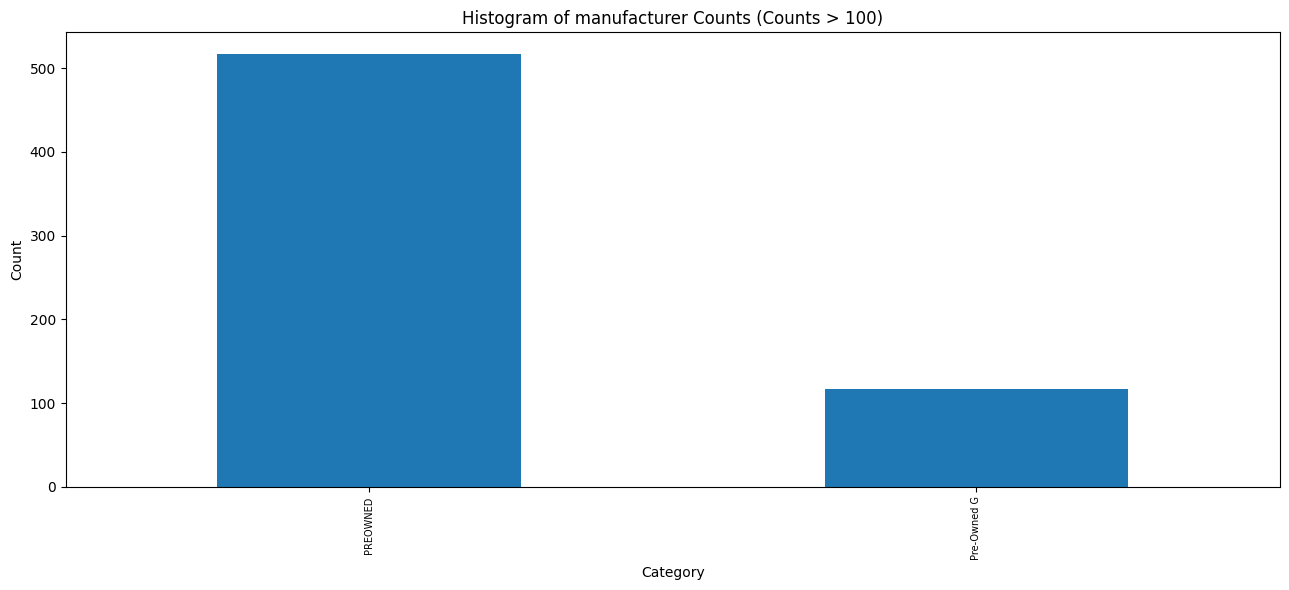

In [14]:
# Manufacturers that have more than 100 items.
import matplotlib.pyplot as plt
manuf_counts_above_100 = manuf_counts[manuf_counts > 100]

plt.figure(figsize=(13, 6))
manuf_counts_above_100.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of manufacturer Counts (Counts > 100)')
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

In [15]:
# Identify if there are duplicate rows
duplicate_rows = data_df[data_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []


In [16]:
# We group the unique values and identify if there are duplicate records
duplicate_groups = data_df.groupby(['sku', 'name', 'type', 'price', 'upc', 'category', 'shipping', 'description', 'manufacturer', 'model', 'url', 'image']).size().reset_index(name='count')
duplicate_above_2 = duplicate_groups[duplicate_groups['count'] > 1]
print(duplicate_above_2)


Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image, count]
Index: []


In [17]:
# Dimension
data_df.shape

(51646, 12)

In [24]:
# Filter the dataset by the most frequently used categories.
all_categories = pd.Series([category for sublist in df['category'] for category in sublist])
category_counts = all_categories.value_counts()
categories_over_100 = category_counts[category_counts > 100].index.tolist()

def has_high_freq_category(category_list):
    return any(category in categories_over_100 for category in category_list)

filtered_df = df[df['category'].apply(has_high_freq_category)]

In [22]:
def count_categories(categories_list):
    return len(categories_list)

df['category_count'] = df['category'].apply(count_categories)
category_distribution = df['category_count'].value_counts(normalize=True) * 100
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['Number of Categories', 'Percentage of Items']

category_distribution_df

,Number of Categories,Percentage of Items
0,4,39.716532
1,3,36.488789
2,2,11.400689
3,5,10.262169
4,1,1.461875
5,6,0.668009
6,7,0.001936


In [25]:
def count_categories(categories_list):
    return len(categories_list)

filtered_df['category_count'] = filtered_df['category'].apply(count_categories)
category_distribution = filtered_df['category_count'].value_counts(normalize=True) * 100
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['Number of Categories', 'Percentage of Items']

category_distribution_df

<ipython-input-25-c31c9dc9f5bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category_count'] = filtered_df['category'].apply(count_categories)


,Number of Categories,Percentage of Items
0,4,39.978167
1,3,36.703185
2,2,11.234356
3,5,10.331787
4,1,1.078015
5,6,0.672541
6,7,0.001949


In [26]:
def count_categories_and_print_distribution(df):
    df['category_count'] = df['category'].apply(lambda x: len(x))

    category_distribution = df['category_count'].value_counts().sort_index()

    for category_count, item_count in category_distribution.items():
        print(f"{category_count} cat {item_count}")

count_categories_and_print_distribution(df)

1 cat 755
2 cat 5888
3 cat 18845
4 cat 20512
5 cat 5300
6 cat 345
7 cat 1


In [27]:
# Distribution of the number of categories by filtered articles (considering all categories)
def count_categories_and_print_distribution(filtered_df):
    filtered_df['category_count'] = filtered_df['category'].apply(lambda x: len(x))

    category_distribution = filtered_df['category_count'].value_counts().sort_index()

    for category_count, item_count in category_distribution.items():
        print(f"{category_count} cat: {item_count}")

count_categories_and_print_distribution(filtered_df)

1 cat: 553
2 cat: 5763
3 cat: 18828
4 cat: 20508
5 cat: 5300
6 cat: 345
7 cat: 1


<ipython-input-27-07dabf86629e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category_count'] = filtered_df['category'].apply(lambda x: len(x))


In [28]:
# Get all the categories and subcategories into a new columns

df_copy = df.copy()

# Function to extract the first category
def extract_first_category(record):
    return record[0]['name']

# function to extract the second category
def extract_second_category(record):
    return record[1]['name'] if len(record) > 1 else None

# Function to extract the third category
def extract_third_category(record):
    return record[2]['name'] if len(record) > 2 else None

# Function to extract the fourth category
def extract_fourth_category(record):
    return record[3]['name'] if len(record) > 3 else None

# Function to extract the fifth category
def extract_fifth_category(record):
    return record[4]['name'] if len(record) > 4 else None

# Function to extract the sixth category
def extract_sixth_category(record):
    return record[5]['name'] if len(record) > 5 else None

# Function to extract the seventh category
def extract_seventh_category(record):
    return record[6]['name'] if len(record) > 6 else None

# Create the new columns
df_copy['parent_category'] = df_copy['category'].apply(extract_first_category)
df_copy['sub_category_1'] = df_copy['category'].apply(extract_second_category)
df_copy['sub_category_2'] = df_copy['category'].apply(extract_third_category)
df_copy['sub_category_3'] = df_copy['category'].apply(extract_fourth_category)
df_copy['sub_category_4'] = df_copy['category'].apply(extract_fifth_category)
df_copy['sub_category_5'] = df_copy['category'].apply(extract_sixth_category)
df_copy['sub_category_6'] = df_copy['category'].apply(extract_seventh_category)


<ipython-input-29-1a0baaa08afe>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=non_null_percentage, x='category', y='percentage', palette=colors)
<ipython-input-29-1a0baaa08afe>:21: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  barplot = sns.barplot(data=non_null_percentage, x='category', y='percentage', palette=colors)


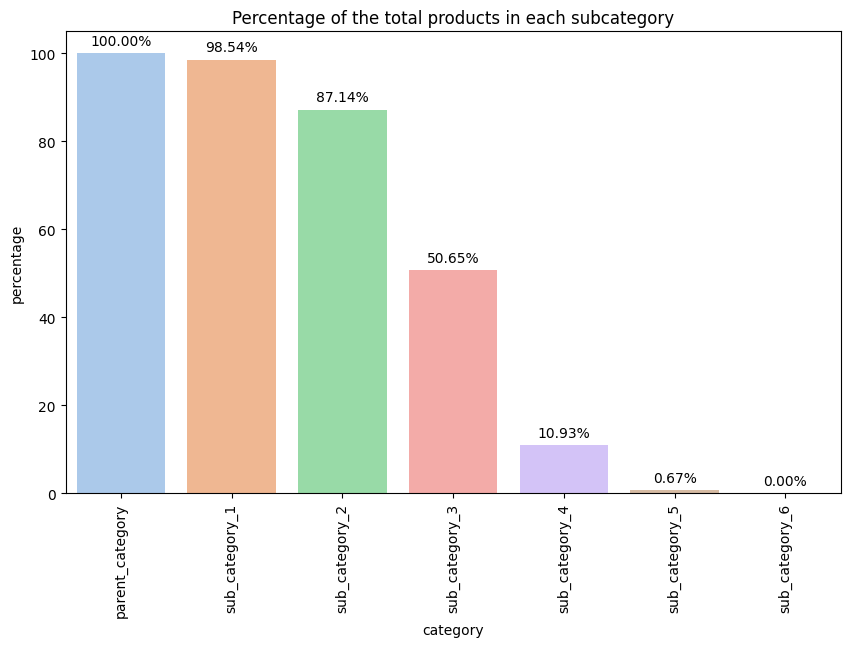

In [29]:
# Plot the new columns with the percatage of non null values
import seaborn as sns

# Create a new dataframe with the percentage of non null values, showing just "parent_category","sub_category_1",
# "sub_category_2","sub_category_3","sub_category_4","sub_category_5","sub_category_6"
non_null_percentage = pd.DataFrame(df_copy[['parent_category','sub_category_1','sub_category_2','sub_category_3',
                                            'sub_category_4','sub_category_5','sub_category_6']].notnull().mean()*100)

# Reset the index
non_null_percentage.reset_index(inplace=True)

# Rename the columns
non_null_percentage.columns = ['category','percentage']

# Create a color palette
colors = sns.color_palette('pastel')

# Plot the percentage of non null values
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=non_null_percentage, x='category', y='percentage', palette=colors)
plt.xticks(rotation=90)
plt.title('Percentage of the total products in each subcategory')

# Add values to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()

We decided that, due to the fact that 99.33% of the records are within the first 5 categories, we will use these records to develop and train the model.

Number of name categories per subcategory:
parent_category: 62
sub_category_1: 175
sub_category_2: 622
sub_category_3: 761
sub_category_4: 196


<ipython-input-32-2369c77c0814>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=unique_values, x='category', y='unique_values', palette=colors)
<ipython-input-32-2369c77c0814>:22: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  barplot = sns.barplot(data=unique_values, x='category', y='unique_values', palette=colors)


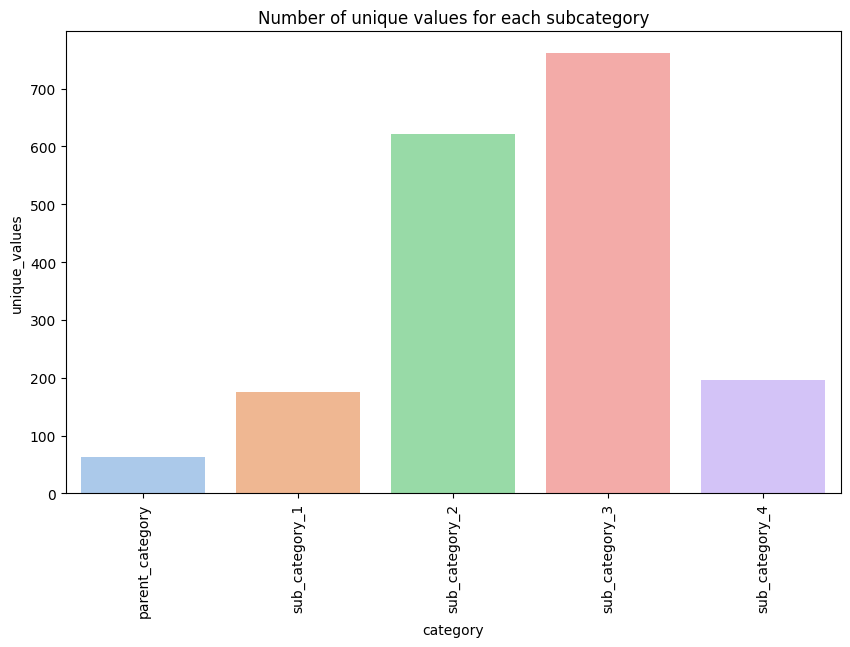

In [32]:
# Columns specified in your code snippet
columns_to_check = ['parent_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']

# Print the number of unique values for each specified column along with column name
print('Number of name categories per subcategory:')
for column in columns_to_check:
    print(f'{column}: {df_copy[column].nunique()}')

# Plot a barplot with the number of unique values for each category

# Create a new dataframe with the number of unique values for each category
unique_values = pd.DataFrame(df_copy[columns_to_check].nunique())

# Reset the index
unique_values.reset_index(inplace=True)

# Rename the columns
unique_values.columns = ['category','unique_values']

# Plot the number of unique values for each category
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=unique_values, x='category', y='unique_values', palette=colors)
plt.xticks(rotation=90)
plt.title('Number of unique values for each subcategory')
plt.show()


Final Form

Based on the previous exploration, we identified that the largest number of products is described in the first 5 categories, taking the first as the parent category and 4 subsequent subcategories.
Given this approach, we proceed to filter the base data to develop the final dataframe for preprocessing and generate the training dataframes.
Finally, we identify that there are records of categories that have a frequency of less than 10, we store them in a new category that we will call 'other'.

In [46]:
split_counts = data_df['category'].str.count(',') + 1
filtered_df = data_df[split_counts <= 5].copy()
filtered_df.reset_index(drop=True, inplace=True)
max_splits = data_df['category'].str.count(',').max()


In [47]:
print(filtered_df.shape)
print(max_splits)
print(filtered_df)

(50041, 12)
7
           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
50036  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
50037  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
50038  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
50039  9999119                             Amazon - Fire TV Stick  HardGood   
50040  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc           

In [48]:
splitting = filtered_df['category'].str.split(',', expand=True)
column_names = ['parent_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']
split_categories = splitting.iloc[:, :5]
split_categories = split_categories.fillna(pd.NA)
filtered_df[column_names] = split_categories

In [49]:
print(filtered_df)

           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
50036  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
50037  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
50038  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
50039  9999119                             Amazon - Fire TV Stick  HardGood   
50040  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc                         

In [50]:
filtered_df.drop(columns=['category',], inplace=True)
filtered_df.shape

(50041, 16)

In [51]:
filtered_url = filtered_df.copy()
filtered_url['url'] = filtered_df['url'].str.split('/').str[4:5].str.join('/')
print(filtered_url['url'])


0                            duracell-aaa-batteries-4-pack
1              duracell-aa-1-5v-coppertop-batteries-4-pack
2                             duracell-aa-batteries-8-pack
3                        energizer-max-batteries-aa-4-pack
4                              duracell-c-batteries-4-pack
                               ...                        
50036    honeywell-true-hepa-replacement-filters-for-se...
50037    dyson-hard-floor-wipes-for-dyson-hard-dc56-vac...
50038              aleratec-drive-enclosure-internal-black
50039                                 amazon-fire-tv-stick
50040             proctor-silex-4-slice-toaster-oven-white
Name: url, Length: 50041, dtype: object


In [52]:
print(filtered_url.shape)
print(filtered_url)

(50041, 16)
           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
50036  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
50037  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
50038  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
50039  9999119                             Amazon - Fire TV Stick  HardGood   
50040  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc shipping  \


In [53]:
# We remove unnecessary columns
filtered_url.drop(columns=['image','sku', 'upc', 'shipping', 'model'], inplace=True)
init_dataset = filtered_url
init_dataset['url'] = init_dataset['url'].str.replace('-', ' ')

In [54]:
print(init_dataset)

                                                    name      type  price  \
0                      Duracell - AAA Batteries (4-Pack)  HardGood   5.49   
1        Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   5.49   
2                       Duracell - AA Batteries (8-Pack)  HardGood   7.49   
3                  Energizer - MAX Batteries AA (4-Pack)  HardGood   4.99   
4                        Duracell - C Batteries (4-Pack)  HardGood   8.99   
...                                                  ...       ...    ...   
50036  Honeywell - True HEPA Replacement Filters for ...  HardGood  49.99   
50037  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   6.99   
50038      Aleratec - Drive Enclosure - Internal - Black  HardGood  35.99   
50039                             Amazon - Fire TV Stick  HardGood  39.99   
50040       Proctor Silex - 4-Slice Toaster Oven - White  HardGood  25.99   

                                             description   manufacturer  \


In [55]:
init_dataset[['parent_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']].nunique()

parent_category     62
sub_category_1     148
sub_category_2     558
sub_category_3     719
sub_category_4     299
dtype: int64

In [60]:
#Explore the parent_category column

# Display the categories that appear 10 times or less
global_counts = init_dataset['parent_category'].value_counts()
rare_categories = global_counts[global_counts <= 10]
print(rare_categories)

# Assign the rare categories to a new list
rare_categories_list = rare_categories.index.tolist()

Voice Recognition Software             9
Bunk Beds & Mattresses                 8
Carfi Instore Only                     7
MP Pending                             7
Outlet Store                           7
Salamander Designs                     6
Other Product Categories               6
Furniture                              4
XBox_Buy2Get1_20130616                 4
Ink for Hewlett-Packard                3
Gift Ideas                             3
Geek Squad Services                    3
Beverage & Wine Coolers                3
Accessories                            2
Freestanding Gas Ranges                2
Analog Audio Cables                    2
Home                                   2
Single Electric Wall Ovens             2
Sports                                 2
Flight                                 1
Headphones                             1
Casino                                 1
Wine Chillers                          1
Education                              1
Board & Puzzle  

In [61]:
# Replace the rare categories with the string 'other' in the original dataframe
init_dataset['parent_category'] = init_dataset['parent_category'].replace(rare_categories_list, 'other')

# Display value counts for the parent_category column
print(init_dataset['parent_category'].value_counts())
print("Number of catgories for parent_category:",init_dataset['parent_category'].nunique())

Appliances                       8747
Cell Phones                      6878
Computers & Tablets              6077
Video Games                      5837
Connected Home & Housewares      4518
Audio                            3603
Cameras & Camcorders             3250
Musical Instruments              3009
Car Electronics & GPS            2655
TV & Home Theater                2139
Health                           1265
Toys                              615
Best Buy Gift Cards               454
Wearable Technology               283
Name Brands                       214
Magnolia Home Theater             148
other                             103
Geek Squad                         96
MP Exclusives                      50
Movies & Music                     46
H/VG_X360/Games/B2G1_20130602      19
Custom Parts                       18
In-Store Only                      17
Name: parent_category, dtype: int64
Number of catgories for parent_category: 23


In [62]:
# List of columns to process
sub_categories = ['sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']

for col in sub_categories:
    # Explore each sub_category column

    # Display the categories that appear 10 times or less
    global_counts = init_dataset[col].value_counts()
    rare_categories = global_counts[global_counts <= 10]
    if rare_categories.empty:
        print(f"No rare categories found in {col}\n")
    else:
        print(f"Rare categories in {col}:\n{rare_categories}")

    # Assign the rare categories to a new list
    rare_categories_list = rare_categories.index.tolist()

    # Replace the rare categories with the string 'other' in the original dataframe
    init_dataset[col] = init_dataset[col].replace(rare_categories_list, 'other')

    # Display value counts for each sub_category column
    print(f"Updated value counts for {col}:\n{init_dataset[col].value_counts()}")
    print(f"Number of categories for {col}: {init_dataset[col].nunique()}\n")

Rare categories in sub_category_1:
 Music (CDs & Vinyl)                   10
 Gaming Collections                     9
 Virtual Reality Headsets               8
 Pet Tracking Devices                   8
 Canon                                  8
 Brother                                7
 Camera & Camcorder Services            6
 Geek Squad Connected Home Services     5
 Tracfone                               5
 Nikon Cameras                          5
 iRobot                                 5
 SteelSeries                            4
 Classic Video Game Systems             4
 Nintendo 2DS                           4
 Razer                                  3
 Portable Audio Services                3
 Camera & Camcorder Accessories         3
 Unique Gifts                           2
 Fitbit Health & Fitness Products       2
 Magellan GPS                           2
 LG                                     2
 Video Game Services                    2
 iPad                                   2

In [63]:
# Save the cleaned dataframe to a new csv file
df.to_csv('alpha2_dataset_cleaned.csv', index=False)